# Numerical Integration: Newton-Coates Formulas  - Chapter 15, McClarren

This section of the course discusses ways to compute the integral of a general
function numerically.

In particular we are interested in ways that we can approximate an integral by a sum with a finite number of terms:

$$ \int\limits_a^b f(x) dx \approx \sum\limits_{l=1}^L w(x_x) f(x_l) $$

Such an approximate is called *quadrature*, but numerical integration is the more modern term. The term quadrature arose from a process in ancient Greek geometry of constructing a square (a quadrilateral) with the same area as a given shape. Writing an integral as a finite sum is analogous to the definition of an integral as a Riemann sum, when the number of intervals goes to infinity. 

Therefore, just as in finite difference
derivatives, we use finite mathematics to approximation the infinitesimals of calculus.

## Newton-Coates Formulas

The Newton–Cotes formulas are ways to approximate an integral by fitting a polynomial
through a given number of points and then doing the integral of that polynomial exactly.
(Clearly, Newton is the larger numerical luminary in the name of this method. One might
suspect that Cotes rode on Isaac Newton’s coat tails here.) The polynomial can be integrated
exactly because integration formulas for polynomials are straightforward. We will not delve
into the general theory of Newton–Cotes formulas, rather we will give three important examples.

### The Midpoint Rule

In the midpoint rule we approximate the integral by the value of the function in the middle
of the range of integration times the length of the region. This simple formula is

$$ I_{midpoint} = h f(\frac{a+b}{2}) \approx \int\limits_a^b f(x) dx $$

where $h=b-a$.

To demonstrate this rule we look at a simple function integrated over an interval with the
midpoint rule:

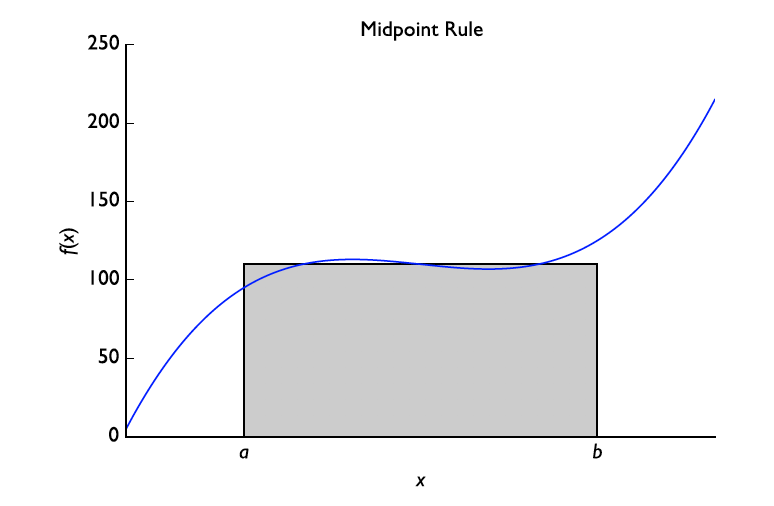

The resulting approximation is not terrible, but there
are clearly parts of the function where the rectangle does not match the function well. We can
do better than a rectangle that approximates the function as flat. Namely we can approximate
the integrand as linear; we do this next.

### The Trapezoidal Rule

In this method we fit a line between a and b and then do the integration. The formula for
this is

$$ I_{trap} = \frac{h}{2} \left( f(a) + f(b) \right)$$

where $h=b-a$.  Here is a graphical example.

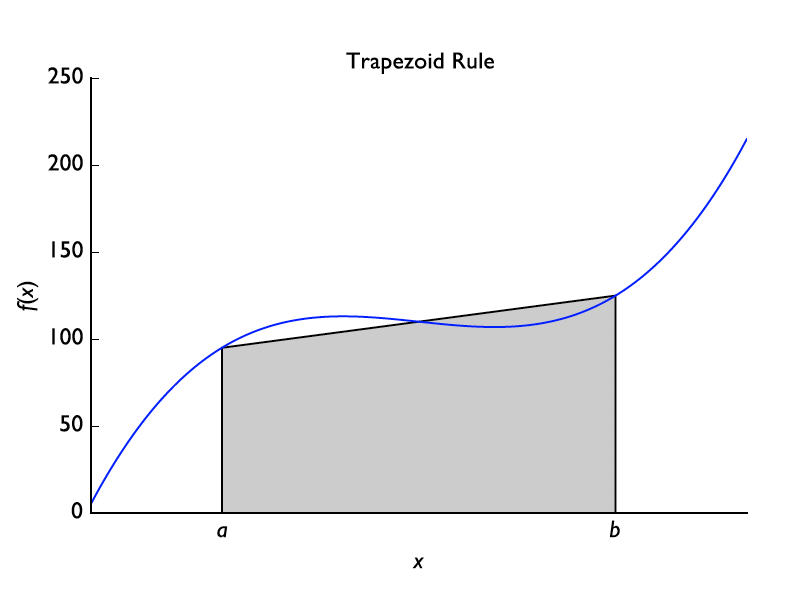

We can see where the rule gets its name. The approximation
to the integral is the area of a trapezoid. Indeed, the approximation formula is the
same as the area of a trapezoid found in geometry textbooks. We can also see in the figure
that the approximation is not exact because the trapezoid does not exactly follow the function,
but if $a$ and $b$ are close enough together it should give a good approximation because
any well-behaved function can be approximated linearly over a narrow enough domain.

That leads to a variation to the trapezoid rule (*and any other rule for that matter*). We can
break up the domain [a, b] into many smaller domains and integrate each of these. Here is an
example where we break [a, b] into 4 pieces:

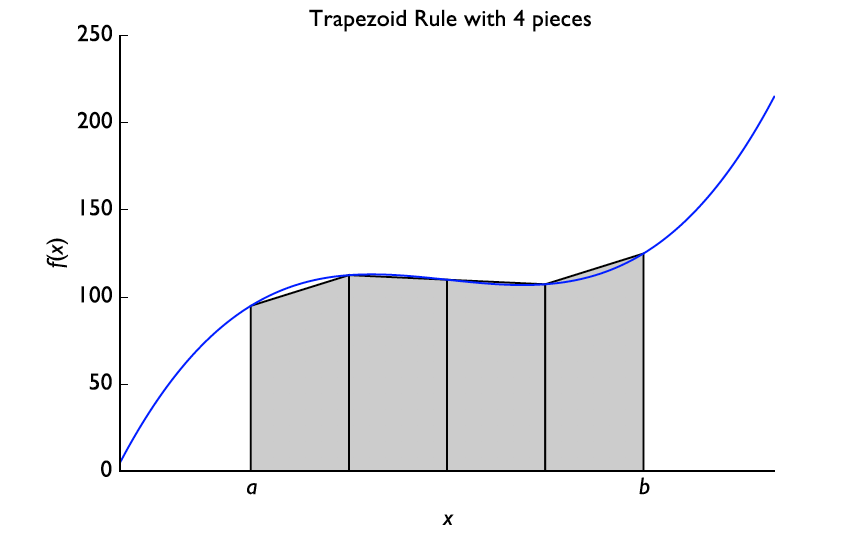

This starting to look better. We can write a trapezoid rule
function that will take in a function, $a$, $b$, and the number of pieces and perform this integration.
Also, because the right side of each piece is the left side of the next piece, if we are clever we can only evaluate the function $N + 1$ times where $N$ is the number of pieces. The following function implements the trapezoid rule.



In [37]:
def trapezoid(f, a, b, pieces):
    """Find the integral of the function f between a and b
    using pieces trapezoids
    Args:
        f: function to integrate
        a: lower bound of integral
        b: upper bound of integral
        pieces: number of pieces to chop [a,b] into
    Returns:
        estimate of integral
    """
    integral = 0
    h = b - a
    #initialize the left function evaluation
    fa = f(a)
    for i in range(pieces):
        #evaluate the function at the left end of the piece
        fb = f(a+(i+1)*h/pieces)
        integral += 0.5*h/pieces*(fa + fb)
        #now make the left function evaluation the right for the next step
        fa = fb
    return integral

We can test this method on a function that we know the integral of

$$ \int\limits_0^{\pi} \sin(x) dx = 2 $$

In [38]:
import numpy as np
integral_estimate = trapezoid(np.sin,0,np.pi,pieces=6)
print("Estimate is",integral_estimate,"Actual value is 2")
integral_estimate = trapezoid(np.sin,0,np.pi,pieces=20)
print("Estimate is",integral_estimate,"Actual value is 2")

Estimate is 1.9540972333137065 Actual value is 2
Estimate is 1.9958859727087146 Actual value is 2


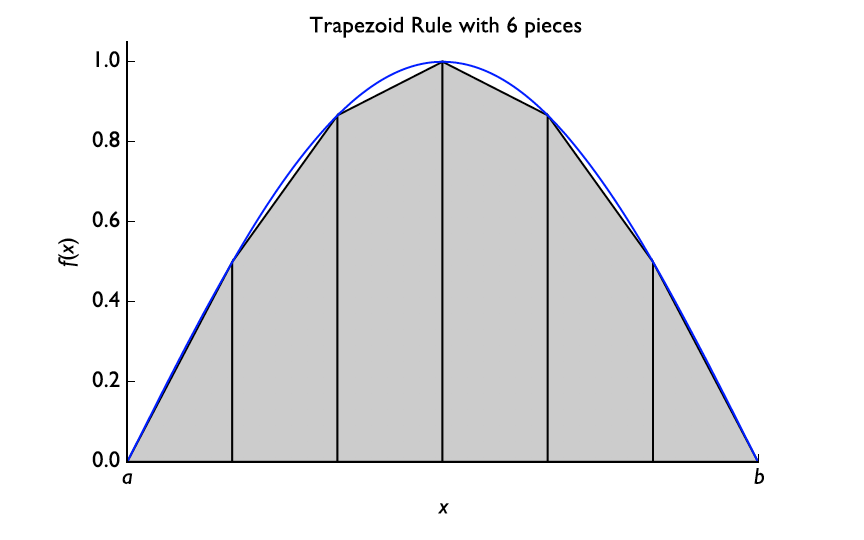

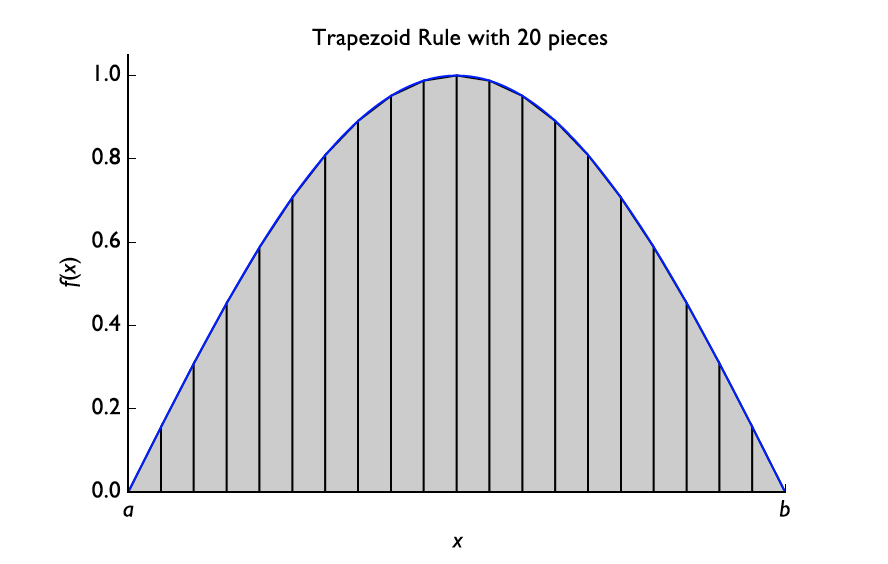

We can run this multiple times and see how the error changes. Similar to what we did for
finite difference derivatives, we can plot the error versus number of pieces on a log-log scale.
In this case, h is the width of each of the pieces: as the number of pieces grows, the value of h
decreases.

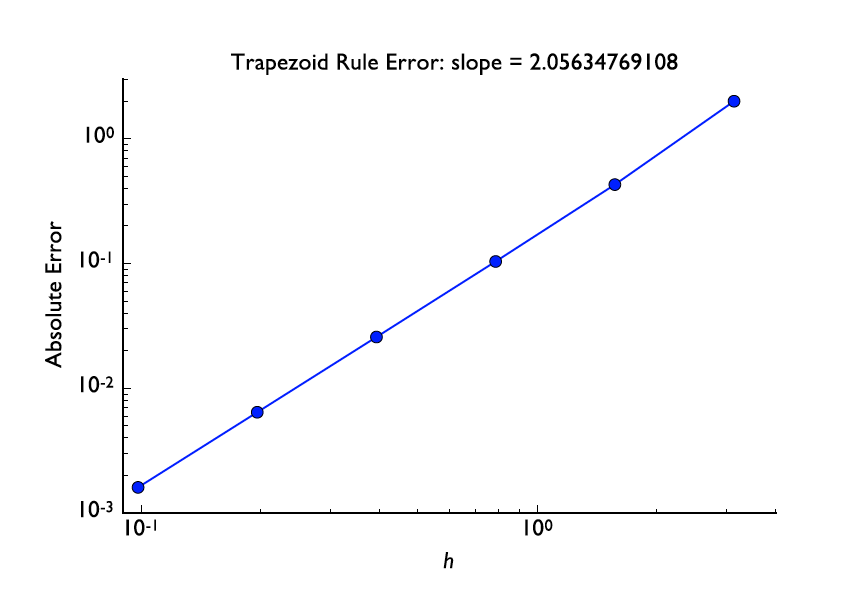

The error in the trapezoid rule that we observe is second-order in h, because the slope of
the error on the log-log scale is 2.

We can see that this is the expected error in the estimate by looking at the linear approximation
to a function around $x = a$:

$$ f(x) = f(a) + (x-a) f'(a) + \frac{(x-a)^2}{2} f''(a) + O((x-a)^3). $$

We can approximate the derivative using a forward difference:

$$f'(a) = \frac{f(b)-f(a)}{h} + O(h),$$

where $h=b-a$. Now the integral of $f(x)$ from $a$ to $b$ becomes

$$\int\limits_a^b f(x) dx = h f(a) + \int\limits_a^b (x-a) f'(a) dx + \int\limits_a^b \frac{(x-a)^2}{2} f''(a) dx + O(h^4).$$

The integral 

$$ \int\limits_a^b (x-a) f'(a) dx = \frac{(b-a)^2}{2} f'(a) = \frac{h^2}{2}\left( \frac{f(b)-f(a)}{h}+O(h) \right) = \frac{h}{2}\left(f(b)-f(a) \right) + O(h^3). $$

Additionally,

$$ \int\limits_a^b \frac{(x-a)^2}{2} f''(a) dx =  - \frac{h^3}{6} f''(a) = O(h^3).$$

When we plug this into the original integral we get

$$\int\limits_a^b f(x) dx = \frac{h}{2}\left(f(b)+f(a) \right) + O(h^3). $$

This says that error in one piece of the trapezoid rule is third-order accurate, which means
the error can be written as $Ch^3 +O(h^4)$. However, when we break the interval into $N$ pieces,
each of size $h = \frac{(b − a)}{N}$, the error terms add and each piece has its own constant so
that

$$\sum\limits_{i=1}^N C_i h^3 \le N h^3 C_{max} = (b-a) C_max h^2, $$

where $C_{max}$ is the maximum value of $|C_i|$.  Therefore, the error in the sum of trapezoid rules
decreases as $h^2$, which we observed above. This analysis can be extended to show that the
error terms in the trapezoid rule only have even powers of $h$:

$$\texttt{Error} = C_2 h^2 + C_4 h^4 + \cdots $$

We will use this later when we combine the trapezoid rule with Richardson extrapolation.

### Simpson's Rule

Simpson’s rule is like the trapezoid rule, except instead of fitting a line we fit a parabola
between three points, $a$, $b$, and $(a+b)/2$. The formula for this is

$$ I_{Simpson} = \frac{h}{6} \left( f(a) + 4 f(a+\frac{h}{2}) + f(h) \right) \approx \int\limits_a^b f(x) dx$$

where $h=b-a$.  [*This is sometimes called Simpsons 1/3 rule, because there is another Simpson
rule that is based on quartic interpolation.*] First, let’s examine how this rule behaves on
the integral of $\sin{x}$ with one piece:

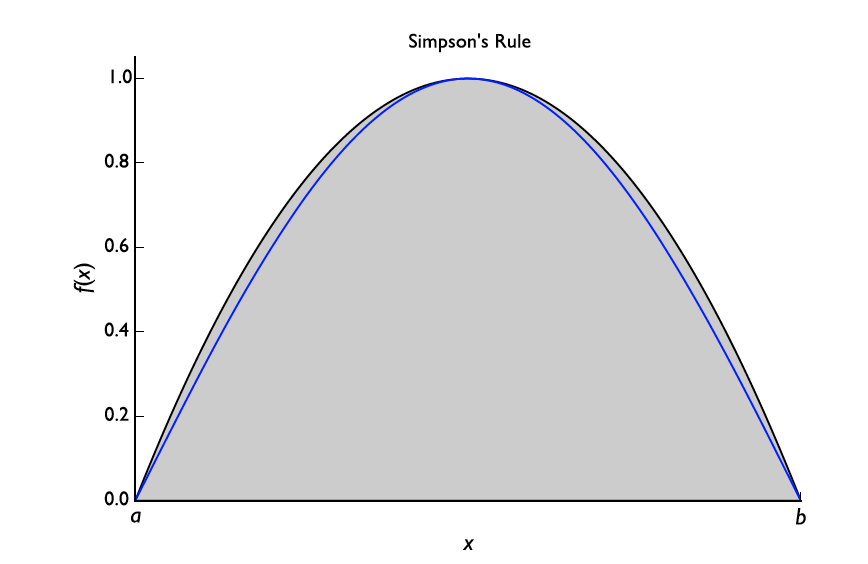

It looks like the function can be well approximated by a parabola.

Here is a function to perform Simpson’s rule just like we did for the trapezoid rule:

In [39]:
def simpsons(f, a, b, pieces):
    """Find the integral of the function f between a and b
    using Simpson’s rule
    Args:
        f: function to integrate
        a: lower bound of integral
        b: upper bound of integral
        pieces: number of pieces to chop [a,b] into
    Returns:
        estimate of integral
    """
    integral = 0
    h = b - a
    one_sixth = 1.0/6.0
    #initialize the left function evaluation
    fa = f(a)
    for i in range(pieces):
        #evaluate the function at the left end of the piece
        fb = f(a+(i+1)*h/pieces)
        fmid = f(0.5*(a+(i+1)*h/pieces+ a+i*h/pieces))
        integral += one_sixth*h/pieces*(fa + 4*fmid + fb)
        #now make the left function evaluation the right for the next step
        fa = fb
    return integral

We then use this function to estimate the integral of the sine function using two and twenty
pieces:

In [40]:
integral_estimate = simpsons(np.sin,0,np.pi,pieces=2)
print("Estimate is",integral_estimate,"Actual value is 2")
integral_estimate = simpsons(np.sin,0,np.pi,pieces=20)
print("Estimate is",integral_estimate,"Actual value is 2")

Estimate is 2.0045597549844207 Actual value is 2
Estimate is 2.0000004230931827 Actual value is 2


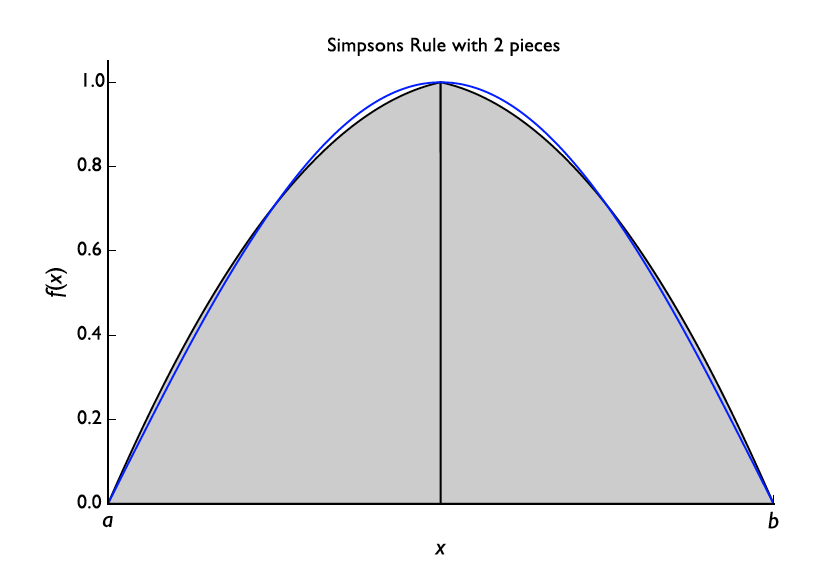

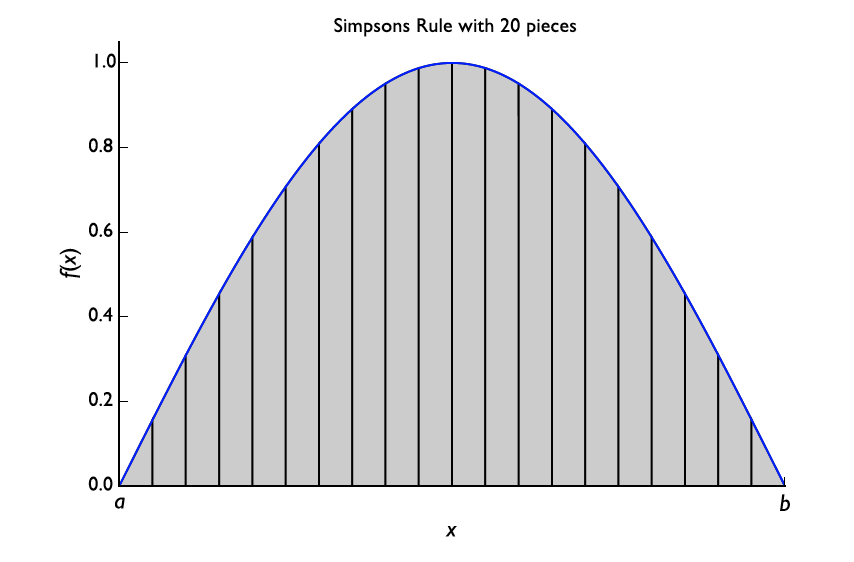

Just like the trapezoid rule, we can look at the error in Simpson’s rule.

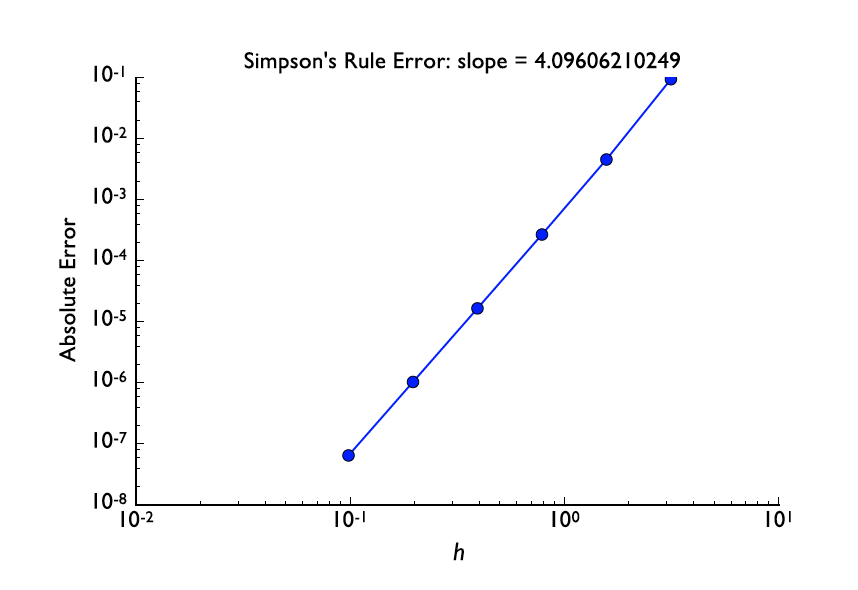

Simpson’s rule is fourth-order in the piece size. This means that every time I double the
number of pieces the error goes down by a factor of 24 = 16.

Before moving on, we will use Simpson’s rule to calculate $\pi$:

$$ \int\limits_0^1 4 \sqrt{1-x^2} dx = \pi.$$

In [41]:
integrand = lambda x: 4*np.sqrt(1-x**2)
simpsons(integrand,0,1,pieces = 8) #actual value is 3.14159

3.134397668984597

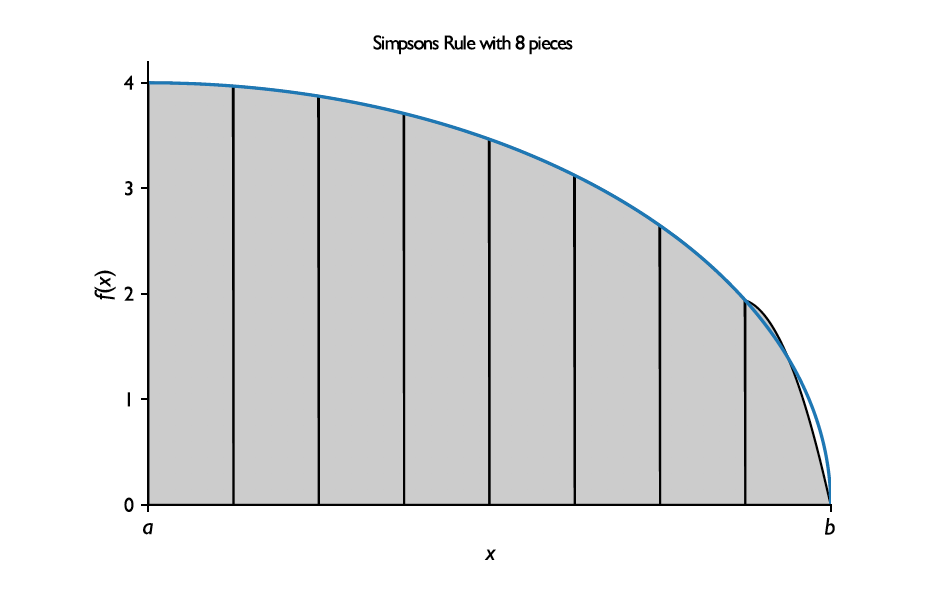

It looks likemost of the error comes at $x = 1$. The reason for this is that function is changing
rapidly near $x = 1$ because there is a singularity in the derivative:

$$ \frac{d}{dx} \left(4 \sqrt{1-x^2} \right) = -\frac{4x}{\sqrt{1-x^2}}.$$

Note that the denominator goes to 0 at x = 1. We'll come back to this!

## Romberg Integration

When we use trapezoid integration, we know that the error is second-order in the piece
size. Using this information we can apply Richardson extrapolation. We can combine the
approximation with one piece with that using two pieces to get a better approximation (one
that is higher-order). Then, we can combine this approximation with the estimate using four
pieces, to get an even better answer. To do this we need to use the fact that the trapezoid rule
only has error terms that are even powers of $h$. To demonstrate this, we will compute the
integral

$$\int\limits_1^2 \frac{\ln{x}}{1+x} dx = 0.1472206769592413 \cdots $$

The result from a one-piece trapezoidal integration is





In [43]:
integrand = lambda x: np.log(x)/(1.0+x)
integral_estimate1 = trapezoid(integrand,1,2,pieces=1)
print("Estimate is",integral_estimate1,"Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-integral_estimate1))

Estimate is 0.11552453009332421 Actual value is 0.1472206769592413, Error is 0.03169614686591708


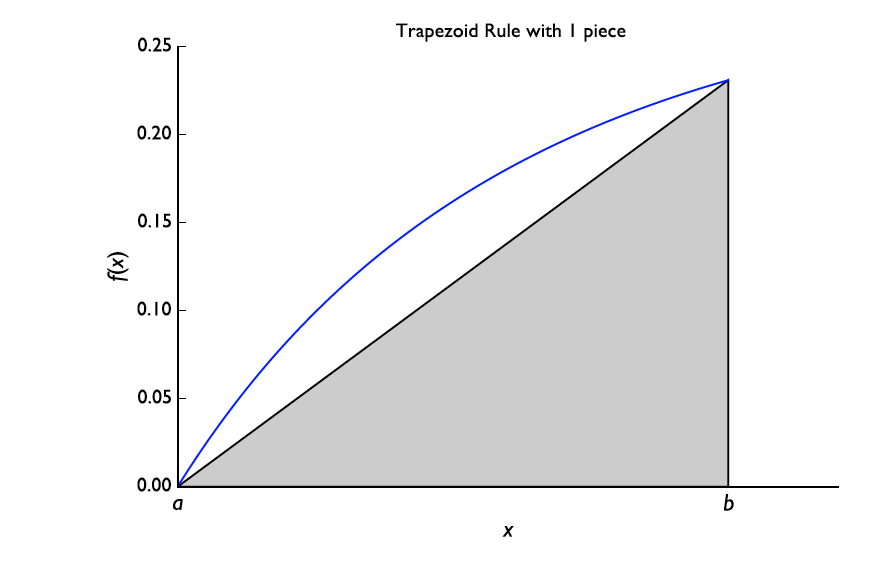

Then we use two-pieces:

In [44]:
integral_estimate2 = trapezoid(integrand,1,2,pieces=2)
print("Estimate is",integral_estimate2,"Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-integral_estimate2))

Estimate is 0.138855286668295 Actual value is 0.1472206769592413, Error is 0.008365390290946295


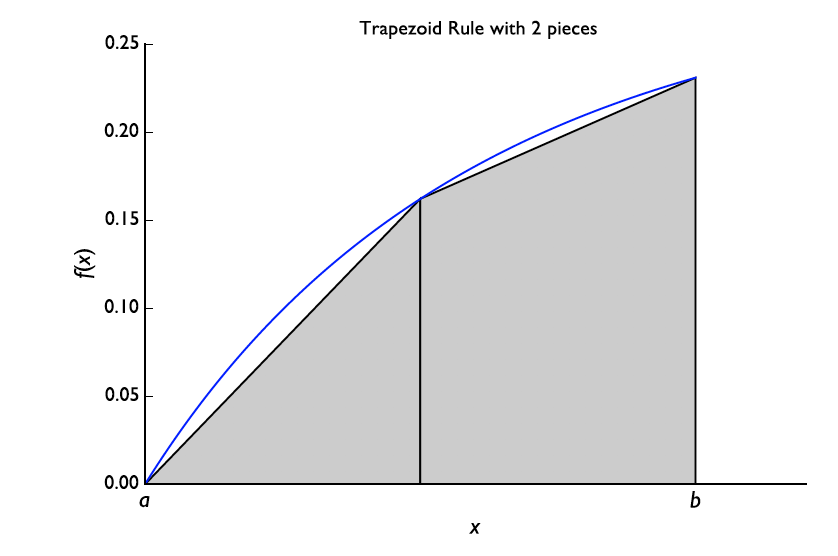

We combine these estimates using Richardson Extrapolation. First, we need to define a
new function for Richardson extrapolation. Our new implementation will use floating point
numbers with higher precision than standard floating point numbers.

In [45]:
import decimal
#set precision to be 100 digits

def RichardsonExtrapolation(fh, fhn, n, k):
    """Compute the Richardson extrapolation based on two approximations of order k
    where the finite difference parameter h is used in fh and h/n in fhn.
    Inputs:
    fh:  Approximation using h
    fhn: Approximation using h/n
    n:   divisor of h
    k:   original order of approximation
    
    Returns:
    Richardson estimate of order k+1"""
    n = decimal.Decimal(n)
    k = decimal.Decimal(k)
    numerator = decimal.Decimal(n**k * decimal.Decimal(fhn) - decimal.Decimal(fh))
    denominator = decimal.Decimal(n**k - decimal.Decimal(1.0))
    return float(numerator/denominator)

To make Richardson work well with high-order approximations we use arbitrary precision
arithmetic using the `decimal` library.

We will apply this function to the approximations with the trapezoid rule above.

In [46]:
Richardson2 = RichardsonExtrapolation(integral_estimate1,integral_estimate2,n=2,k=2)
print("Estimate is",Richardson2,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-Richardson2))

Estimate is 0.1466322055266186 Actual value is 0.1472206769592413, Error is 0.0005884714326226947


By applying Richardson extrapolation, we improved the estimate by an order of magnitude.
Now if we use 4 points, we get

In [47]:
integral_estimate4 = trapezoid(integrand,1,2,pieces=4)
print("Estimate is",integral_estimate4,
"Actual value is 0.1472206769592413, Error is",
np.fabs(0.1472206769592413-integral_estimate4))

Estimate is 0.14509553379753246 Actual value is 0.1472206769592413, Error is 0.0021251431617088368


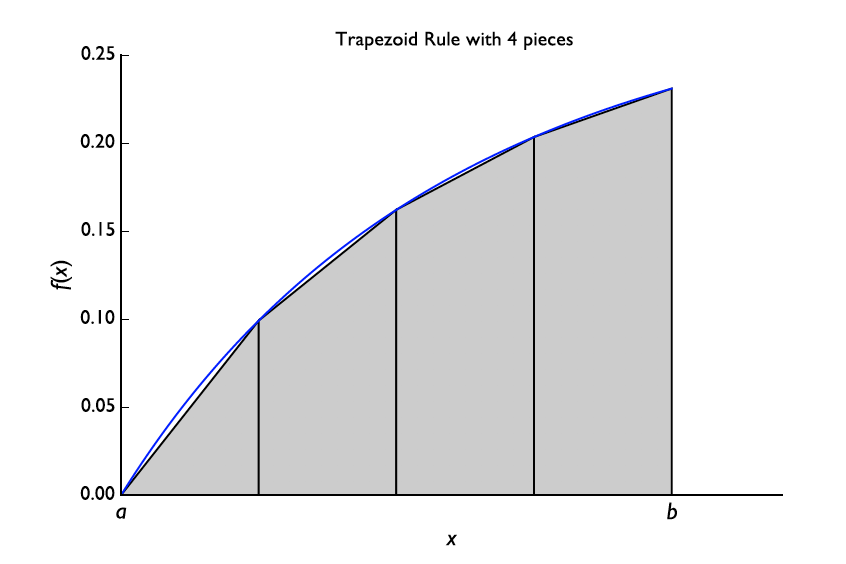

There are two Richardson extrapolations we can do at this point, one between the 4 and 2
piece estimates, and then one that combines the two Richardson extrapolations:

In [48]:
Richardson4 = RichardsonExtrapolation(integral_estimate2,integral_estimate4, n=2,k=2)
print("Estimate is",Richardson4,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-Richardson4))

Estimate is 0.14717561617394495 Actual value is 0.1472206769592413, Error is 4.506078529634139e-05


In [49]:
Richardson42 = RichardsonExtrapolation(Richardson2,Richardson4,n=2,k=4)
#note this is fourth order
print("Estimate is",Richardson42,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-Richardson42))

Estimate is 0.14721184355043337 Actual value is 0.1472206769592413, Error is 8.83340880791783e-06


Notice that the error from combining the two extrapolations is 3 orders of magnitude
smaller than the error using 4 pieces. We could continue on by hand, but it is
pretty easy to write a function for this. This procedure is called *Romberg integration*,
and that is what we will name our function. The function will return a table of approximations
where the first column is the original trapezoid rule approximations and
the subsequent columns are a Richardson extrapolation of the column that came before.

In [50]:
def Romberg(f, a, b, MaxLevels = 10, epsilon = 1.0e-6, PrintMatrix = False):
    """Compute the Romberg integral of f from a to b
    Inputs:
    f:  integrand function
    a: left edge of integral
    b: right edge of integral
    MaxLevels: Number of levels to take the integration to
    
    Returns:
    Romberg integral estimate"""
    
    estimate = np.zeros((MaxLevels,MaxLevels))
    
    estimate[0,0] = trapezoid(f,a,b,pieces=1)
    count = 1
    converged = 0
    while not(converged):
        estimate[count,0] = trapezoid(f,a,b,pieces=2**count)
        for extrap in range(count):
            estimate[count,1+extrap] = RichardsonExtrapolation(estimate[count-1,extrap],
                                                               estimate[count,extrap],2,2**(extrap+1))
        
        converged = np.fabs(estimate[count,count] - estimate[count-1,count-1]) < epsilon
        if (count == MaxLevels-1): converged = 1
        count += 1
    if (PrintMatrix):
        print(estimate[0:count,0:count])
    return estimate[count-1, count-1]

This function is defined to compute the integral estimate using a series of intervals and
can print out the intermediate estimates and the extrapolated values. We will test this on the
same integral as before.

In [51]:
#this should give us what we got before
integral_estimate = Romberg(integrand,1,2,MaxLevels=3, PrintMatrix=True)
print("Estimate is",integral_estimate,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-integral_estimate))

[[0.11552453 0.         0.        ]
 [0.13885529 0.14663221 0.        ]
 [0.14509553 0.14717562 0.14721184]]
Estimate is 0.14721184355043337 Actual value is 0.1472206769592413, Error is 8.83340880791783e-06


In [52]:
#Now let it converge, don’t set Max Levels so low
integral_estimate = Romberg(integrand,1,2,MaxLevels = 10, PrintMatrix=True,epsilon = 1.0e-10)
print("Estimate is",integral_estimate,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-integral_estimate))

[[0.11552453 0.         0.         0.         0.         0.
  0.        ]
 [0.13885529 0.14663221 0.         0.         0.         0.
  0.        ]
 [0.14509553 0.14717562 0.14721184 0.         0.         0.
  0.        ]
 [0.14668713 0.14721767 0.14722047 0.14722051 0.         0.
  0.        ]
 [0.14708715 0.14722049 0.14722067 0.14722067 0.14722067 0.
  0.        ]
 [0.14718729 0.14722066 0.14722068 0.14722068 0.14722068 0.14722068
  0.        ]
 [0.14721233 0.14722068 0.14722068 0.14722068 0.14722068 0.14722068
  0.14722068]]
Estimate is 0.14722067695852226 Actual value is 0.1472206769592413, Error is 7.190359418984826e-13


As one final example we will estimate $\pi$:

In [53]:
integrand = lambda x: 4*np.sqrt(1-x**2)
integral_estimate = Romberg(integrand,0,1,MaxLevels = 8,PrintMatrix=False, epsilon = 1.0e-10)
print("Estimate is",integral_estimate,"Actual value is",np.pi,", Error is",
      np.fabs(np.pi-integral_estimate))

Estimate is 3.141316114250725 Actual value is 3.141592653589793 , Error is 0.000276539339068016


One thing to note is that our implementation of Romberg integration is not the most efficient.
Technically, we are evaluating the function more times than we need to because when
we call the trapezoid rule function with more pieces we are evaluating the function again at
places we already did (for example, $f(a)$ and $f(b)$ are evaluated each time). However, making
the most efficient algorithm would not make the most useful teaching example. For our
purposes it suffices to know that this can be done in a smarter way if each function evaluation
takes a long time.

There also is no reason we could not use the Romberg idea using Simpson’s rule. Here is a
function for that.

In [54]:
def RombergSimps(f, a, b, MaxLevels = 10, epsilon = 1.0e-6,
                 PrintMatrix = False):
    """Compute the Romberg integral of f from a to b
    Inputs:
        f: integrand function
        a: left edge of integral
        b: right edge of integral
        MaxLevels: Number of levels to take the integration to
    Returns:
        Romberg integral estimate
    """
    estimate = np.zeros((MaxLevels,MaxLevels))
    estimate[0,0] = simpsons(f,a,b,pieces=1)
    i = 1
    converged = 0
    while not(converged):
        estimate[i,0] = simpsons(f,a,b,pieces=2**i)
        for extrap in range(i):
            estimate[i,1+extrap] = RichardsonExtrapolation(estimate[i-1,extrap],
                                                           estimate[i,extrap],
                                                           n=2,k=2+2.0**(extrap+1))
        converged = np.fabs(estimate[i,i] - estimate[i-1,i-1]) < epsilon
        if (i == MaxLevels-1): converged = 1
        i += 1
    if (PrintMatrix):
        print(estimate[0:i,0:i])
    return estimate[i-1, i-1]

Using this function we can get a good estimate of the integral of the rational function from


In [55]:
#this should be better than what we got before,
#Error was 8.83340880792e-06
integrand = lambda x: np.log(x)/(1.0+x)
integral_estimate = RombergSimps(integrand,1,2,MaxLevels=3,PrintMatrix=True)
print("Estimate is",integral_estimate,
      "Actual value is 0.1472206769592413, Error is",
      np.fabs(0.1472206769592413-integral_estimate))

[[0.14663221 0.         0.        ]
 [0.14717562 0.14721184 0.        ]
 [0.14721767 0.14722047 0.14722061]]
Estimate is 0.14722060852200503 Actual value is 0.1472206769592413, Error is 6.843723626692721e-08


Applying this to estimate $\pi$ using the default number of levels, we get

In [56]:
integrand = lambda x: 4*np.sqrt(1-x**2)
#trapezoid error was 0.00221405375506
integral_estimate = RombergSimps(integrand,0,1,MaxLevels = 8,
                                 PrintMatrix=True, epsilon = 1.0e-10)
print("Estimate is",integral_estimate,
      "Actual value is",np.pi,", Error is",
      np.fabs(np.pi-integral_estimate))

[[2.97606774 0.         0.         0.         0.         0.
  0.         0.        ]
 [3.08359515 3.09076365 0.         0.         0.         0.
  0.         0.        ]
 [3.12118917 3.12369544 3.12421816 0.         0.         0.
  0.         0.        ]
 [3.13439767 3.13527824 3.13546209 3.13547308 0.         0.
  0.         0.        ]
 [3.13905222 3.13936252 3.13942735 3.13943123 3.13943124 0.
  0.         0.        ]
 [3.14069508 3.1408046  3.14082749 3.14082886 3.14082886 3.14082886
  0.         0.        ]
 [3.14127542 3.14131411 3.1413222  3.14132268 3.14132268 3.14132268
  3.14132268 0.        ]
 [3.14148051 3.14149419 3.14149704 3.14149722 3.14149722 3.14149722
  3.14149722 3.14149722]]
Estimate is 3.141497216049732 Actual value is 3.141592653589793 , Error is 9.543754006102745e-05


To get 10 digits of accuracy we need 20 levels or $2^{20}$ = 1 048 576 intervals:

In [57]:
integrand = lambda x: 4*np.sqrt(1-x**2)
integral_estimate = RombergSimps(integrand,0,1,MaxLevels = 20,
PrintMatrix=False, epsilon = 1.0e-14)
print("Estimate is",integral_estimate,
      "Actual value is",np.pi,", Error is",
      np.fabs(np.pi-integral_estimate))

Estimate is 3.1415926532258305 Actual value is 3.141592653589793 , Error is 3.6396263780602567e-10
